In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [3]:
df= pd.read_csv('Heart Disease Data 2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.shape
df['HeartDiseaseorAttack'].value_counts()


HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64

## wizualizacja danych 

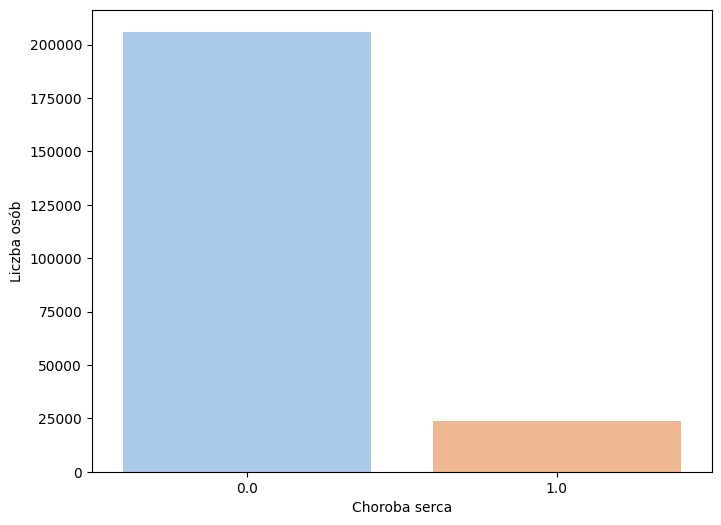

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDiseaseorAttack', data=df, palette='pastel')
plt.xlabel('Choroba serca')
plt.ylabel('Liczba osób')
plt.show()

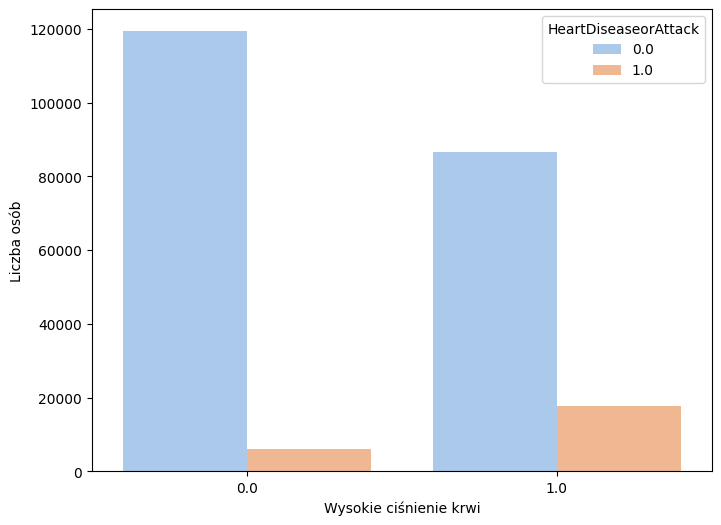

In [8]:

plt.figure(figsize=(8, 6))
sns.countplot(x="HighBP", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('Wysokie ciśnienie krwi')
plt.ylabel('Liczba osób')
plt.show()

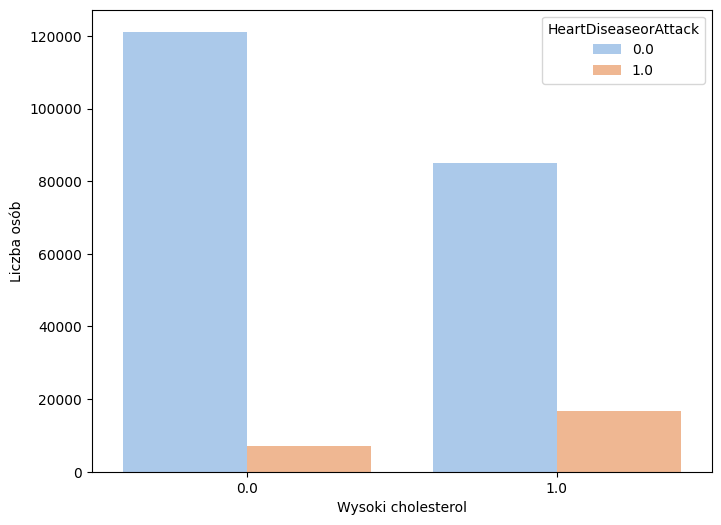

In [9]:

plt.figure(figsize=(8, 6))
sns.countplot(x="HighChol", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('Wysoki cholesterol')
plt.ylabel('Liczba osób')
plt.show()

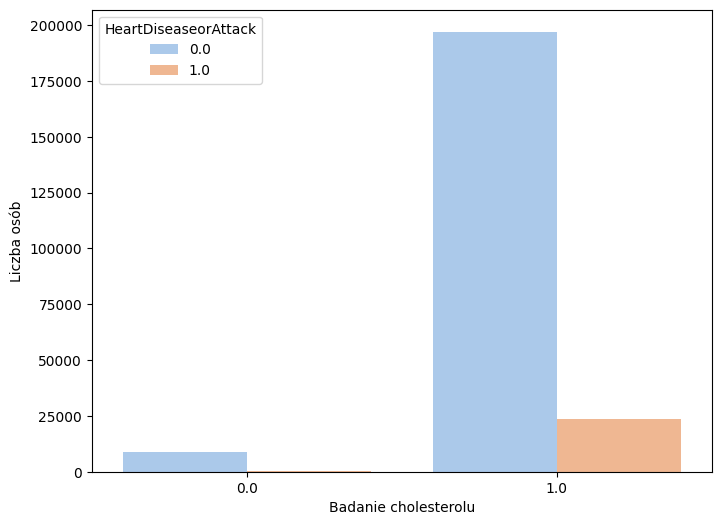

In [10]:

plt.figure(figsize=(8, 6))
sns.countplot(x="CholCheck", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('Badanie cholesterolu')
plt.ylabel('Liczba osób')
plt.show()

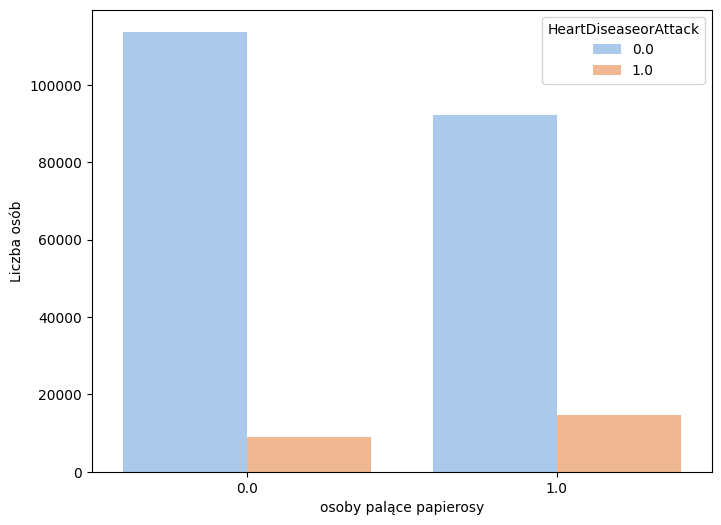

In [11]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Smoker", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('osoby palące papierosy')
plt.ylabel('Liczba osób')
plt.show()

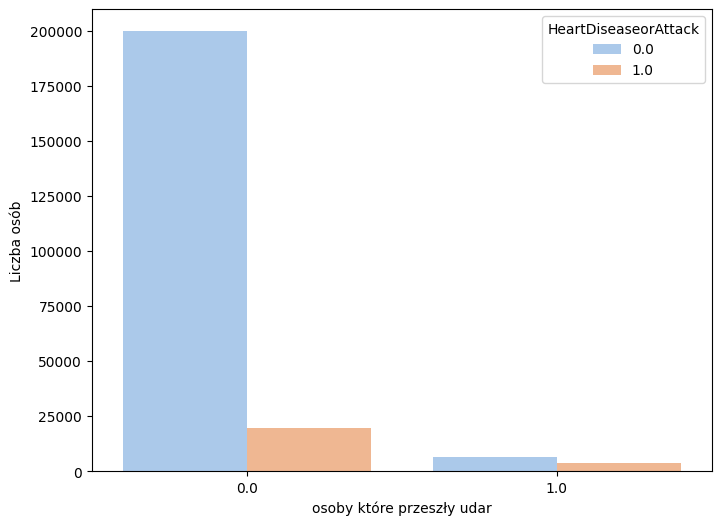

In [12]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Stroke", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('osoby które przeszły udar')
plt.ylabel('Liczba osób')
plt.show()

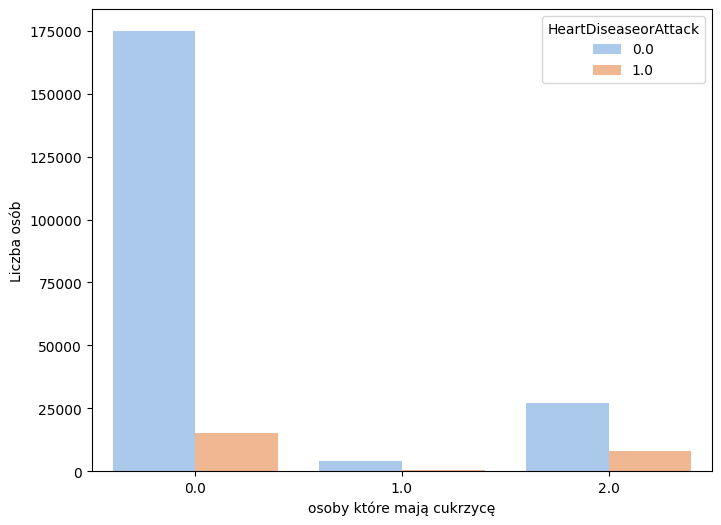

In [13]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Diabetes", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('osoby które mają cukrzycę')
plt.ylabel('Liczba osób')
plt.show()

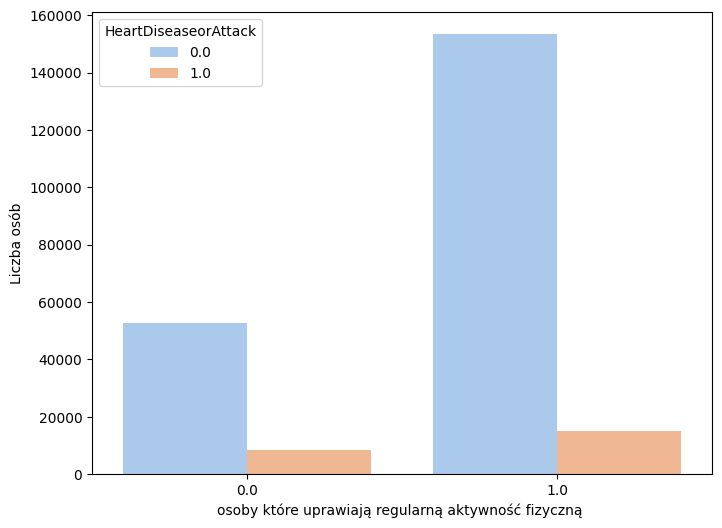

In [14]:

plt.figure(figsize=(8, 6))
sns.countplot(x="PhysActivity", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('osoby które uprawiają regularną aktywność fizyczną ')
plt.ylabel('Liczba osób')
plt.show()

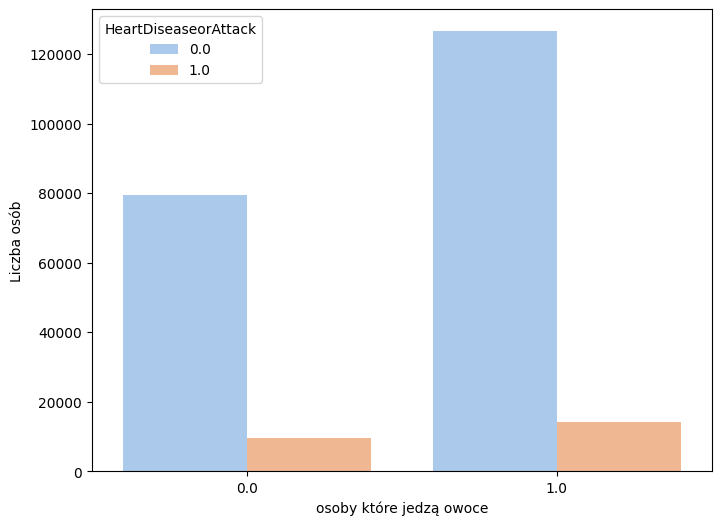

In [15]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Fruits", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('osoby które jedzą owoce')
plt.ylabel('Liczba osób')
plt.show()

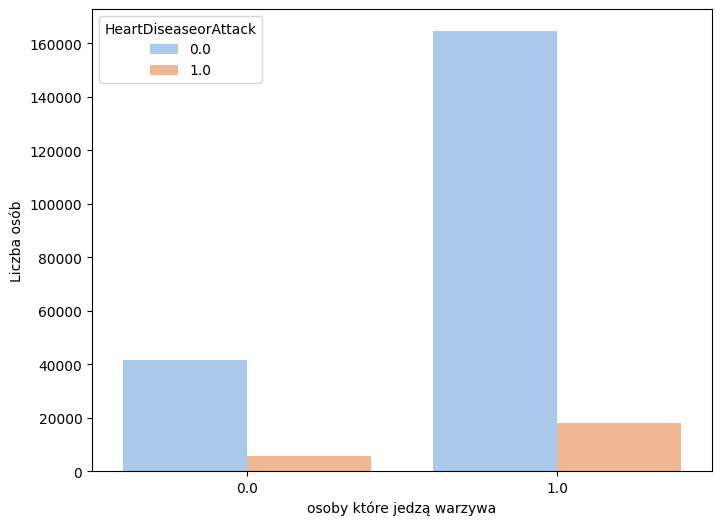

In [16]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Veggies", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('osoby które jedzą warzywa')
plt.ylabel('Liczba osób')
plt.show()

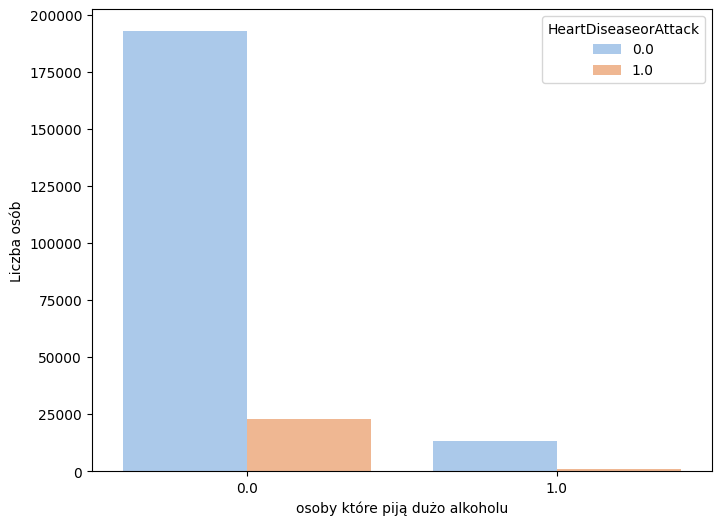

In [17]:

plt.figure(figsize=(8, 6))
sns.countplot(x="HvyAlcoholConsump", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('osoby które piją dużo alkoholu')
plt.ylabel('Liczba osób')
plt.show()

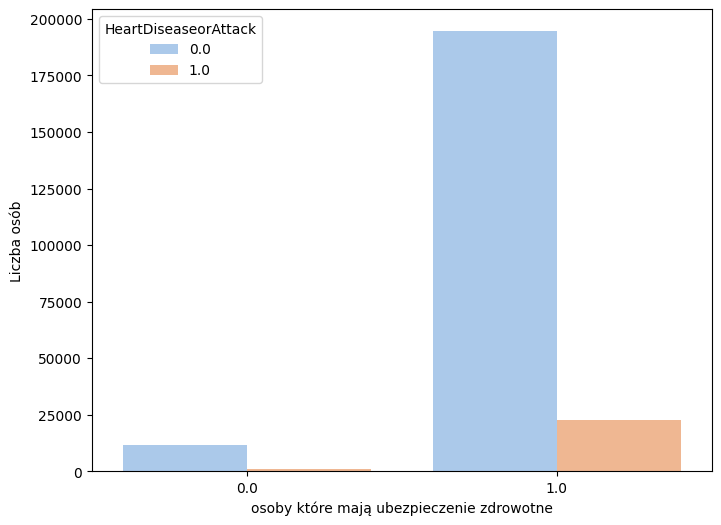

In [18]:

plt.figure(figsize=(8, 6))
sns.countplot(x="AnyHealthcare", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('osoby które mają ubezpieczenie zdrowotne')
plt.ylabel('Liczba osób')
plt.show()

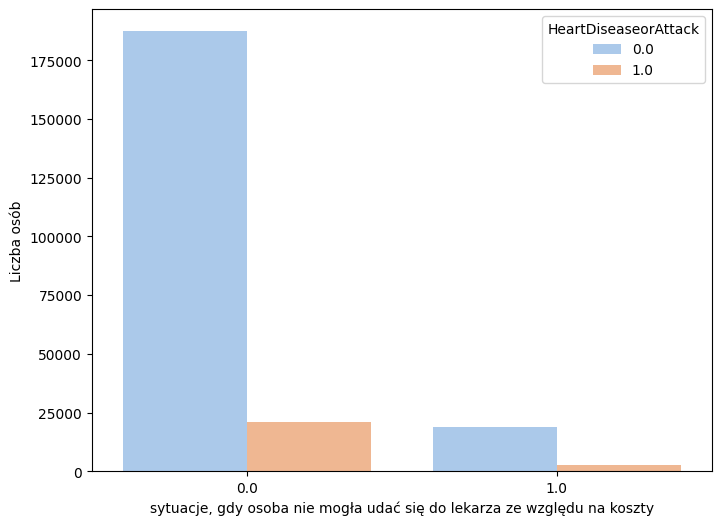

In [19]:

plt.figure(figsize=(8, 6))
sns.countplot(x="NoDocbcCost", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('sytuacje, gdy osoba nie mogła udać się do lekarza ze względu na koszty')
plt.ylabel('Liczba osób')
plt.show()

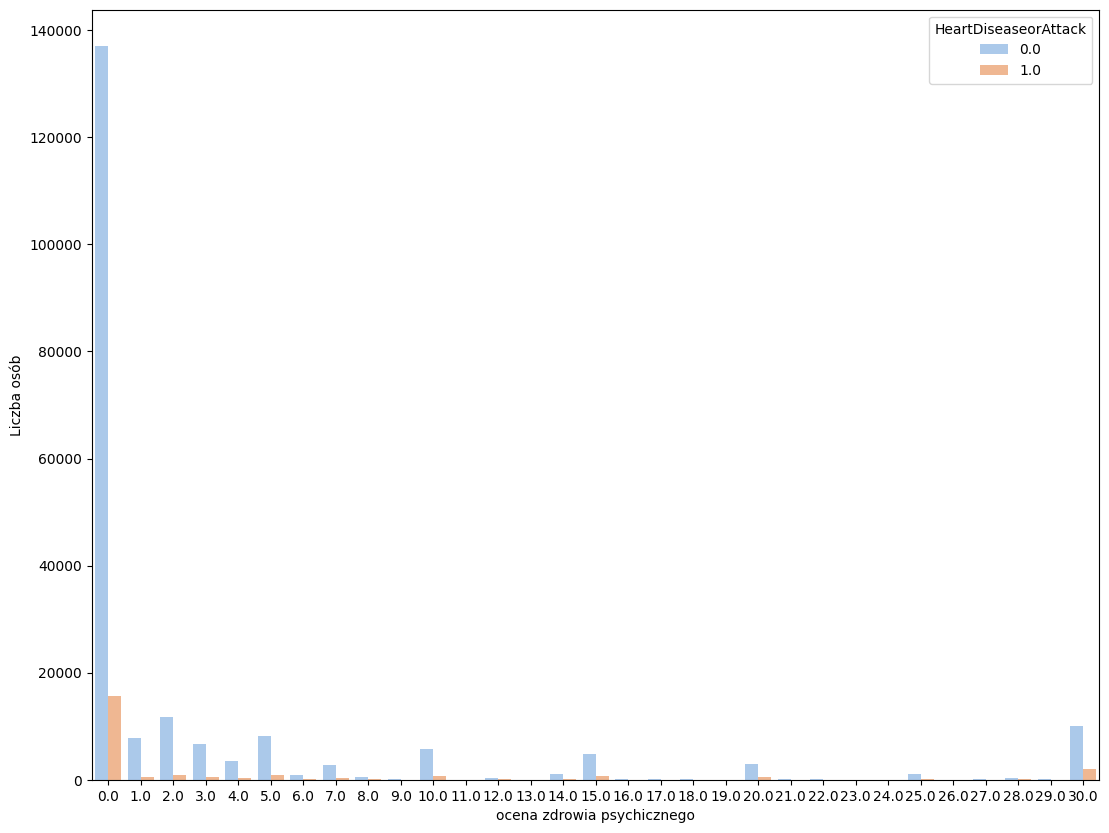

In [20]:

plt.figure(figsize=(13, 10))
sns.countplot(x="MentHlth", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('ocena zdrowia psychicznego')
plt.ylabel('Liczba osób')
plt.show()

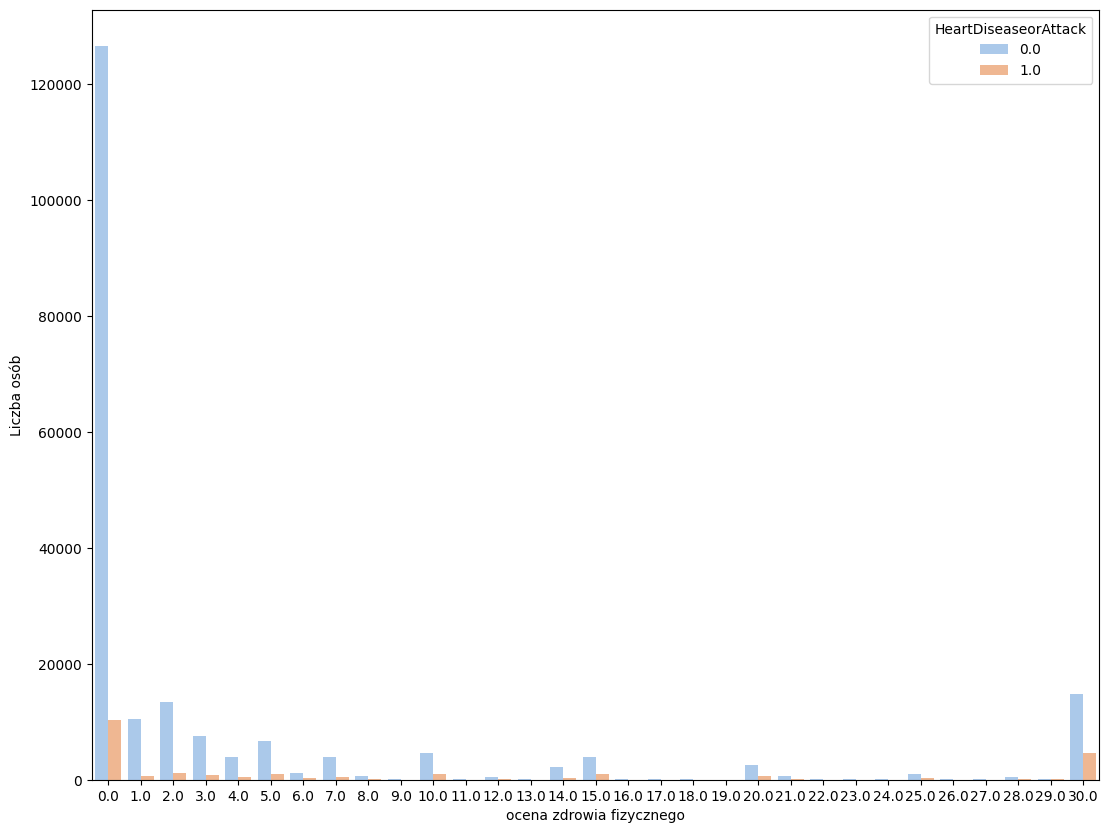

In [21]:

plt.figure(figsize=(13, 10))
sns.countplot(x="PhysHlth", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('ocena zdrowia fizycznego')
plt.ylabel('Liczba osób')
plt.show()

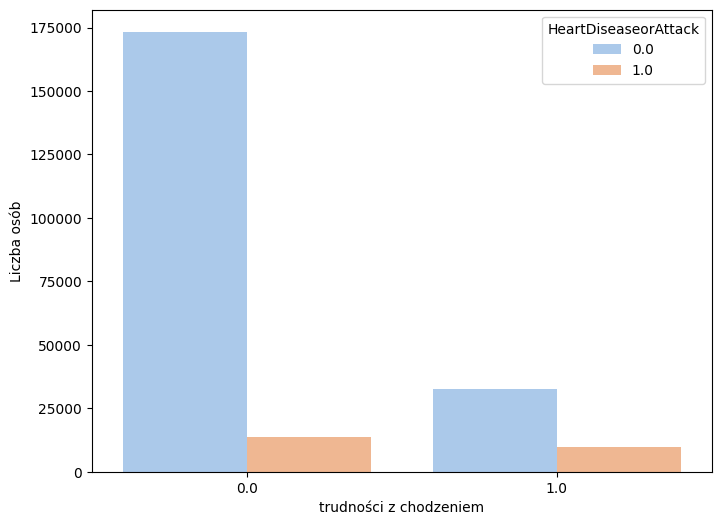

In [22]:

plt.figure(figsize=(8, 6))
sns.countplot(x="DiffWalk", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('trudności z chodzeniem')
plt.ylabel('Liczba osób')
plt.show()

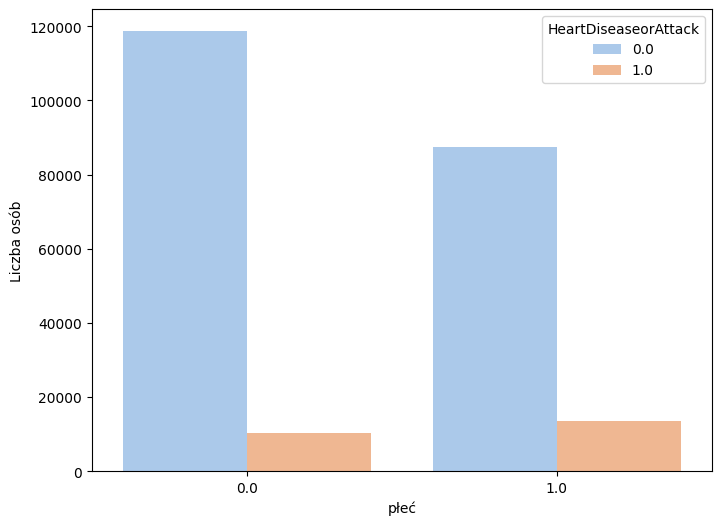

In [23]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Sex", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('płeć')
plt.ylabel('Liczba osób')
plt.show()

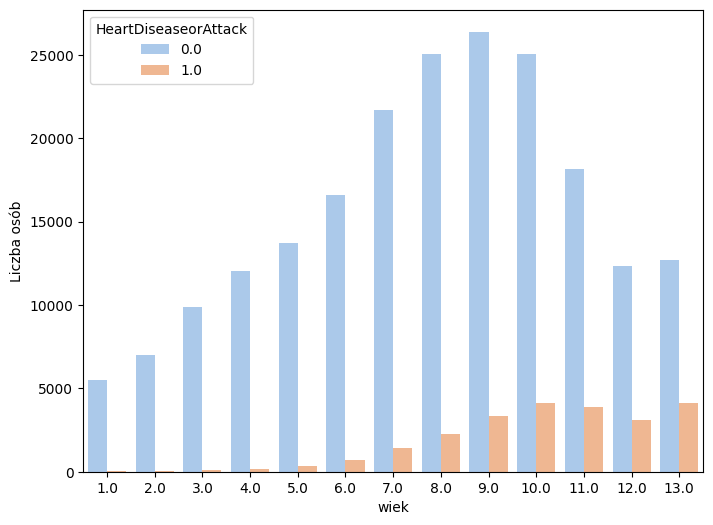

In [24]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Age", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('wiek')
plt.ylabel('Liczba osób')
plt.show()

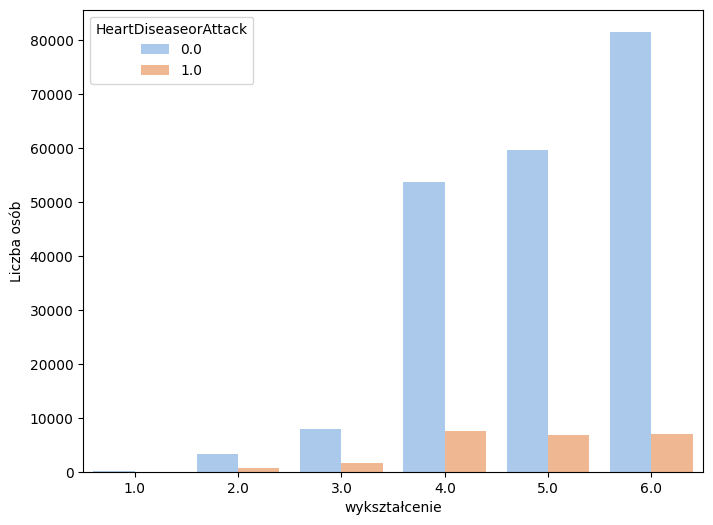

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Education", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('wykształcenie')
plt.ylabel('Liczba osób')
plt.show()

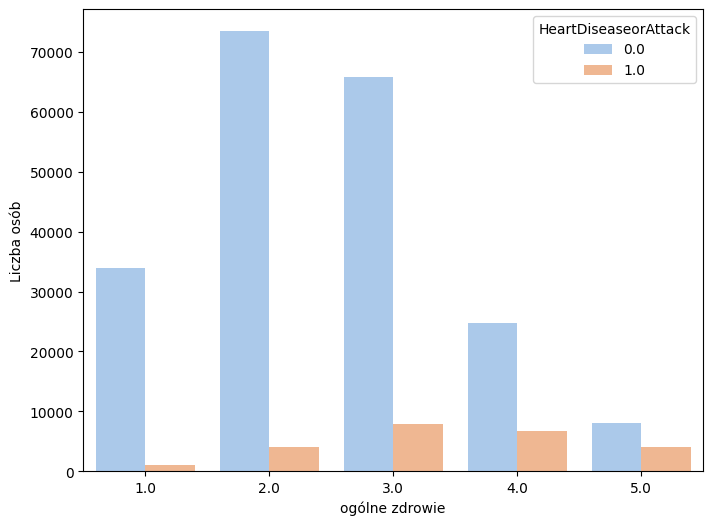

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x="GenHlth", data=df, hue="HeartDiseaseorAttack", palette="pastel")
plt.xlabel('ogólne zdrowie')
plt.ylabel('Liczba osób')
plt.show()

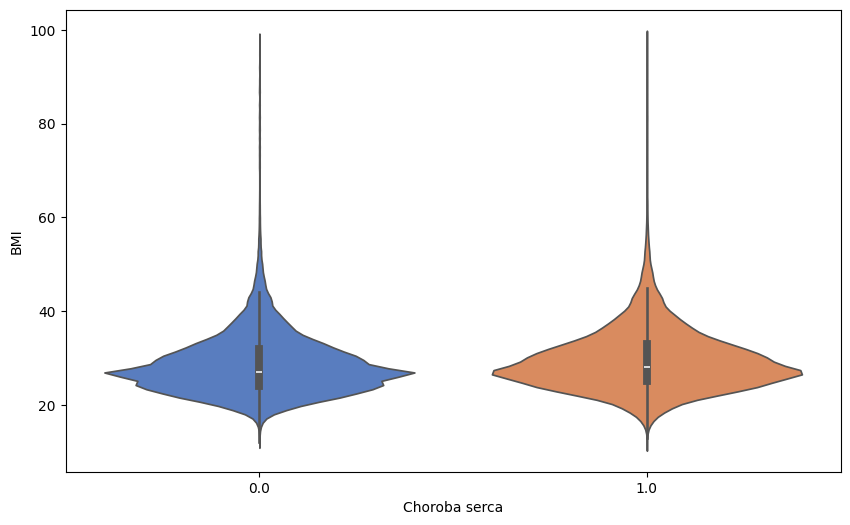

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HeartDiseaseorAttack', y='BMI', data=df, palette="muted")
plt.xlabel("Choroba serca")
plt.ylabel("BMI")
plt.show()

## naszą cechą celu jest HeartDiseaseorAttack

In [28]:
da2=df['HeartDiseaseorAttack'].value_counts().reset_index(name='count')
da2

,HeartDiseaseorAttack,count
0,0.0,206064
1,1.0,23717


## Korelacja

<Axes: >

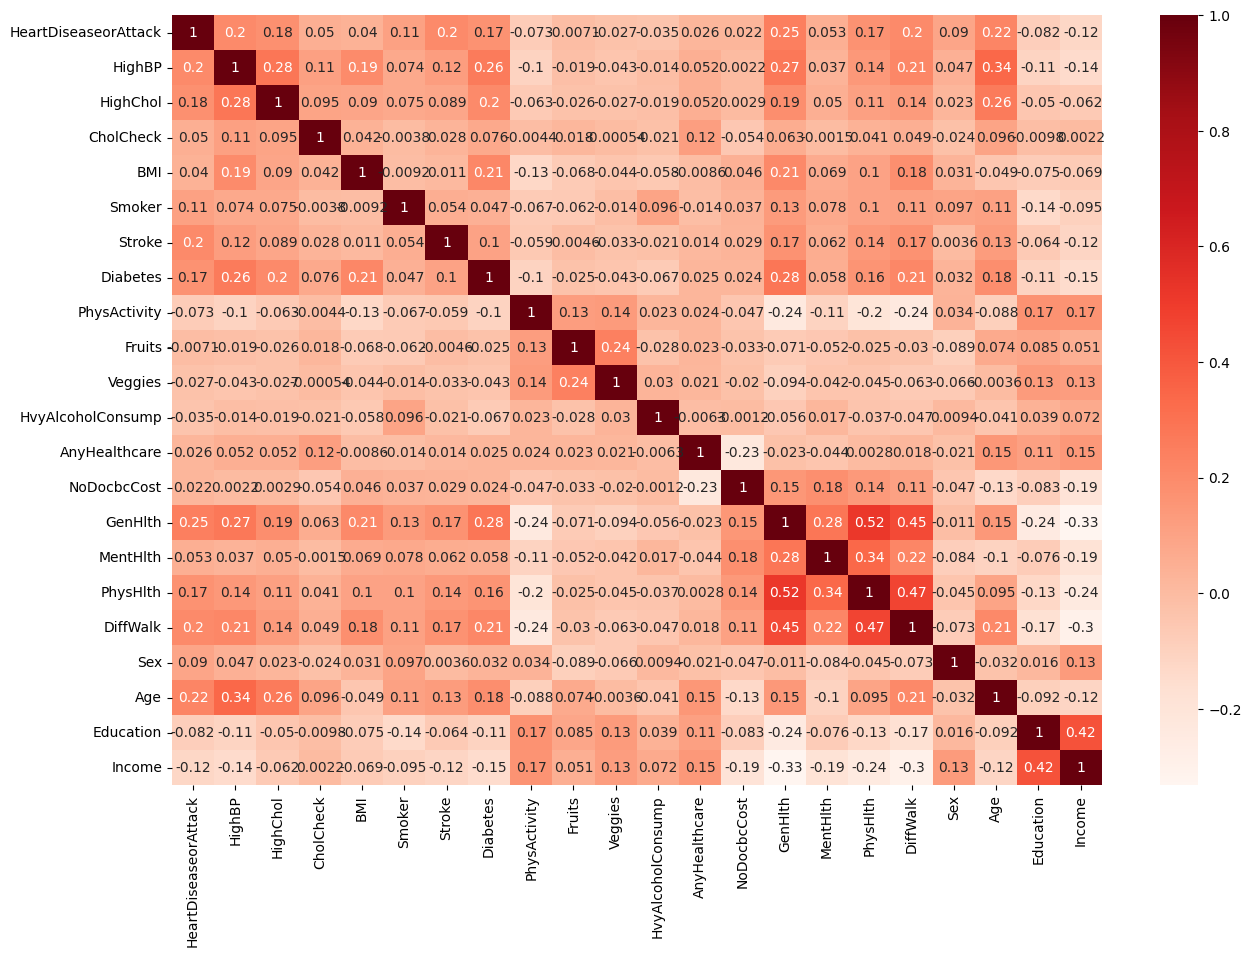

In [29]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,cmap='Reds')

## VIF- sprawdzenie istotności cech

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns


vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data)

                 feature        VIF
0   HeartDiseaseorAttack   1.300799
1                 HighBP   2.385087
2               HighChol   2.086330
3              CholCheck  21.489154
4                    BMI  17.570066
5                 Smoker   1.986207
6                 Stroke   1.128422
7               Diabetes   1.424620
8           PhysActivity   4.144057
9                 Fruits   2.828436
10               Veggies   5.287618
11     HvyAlcoholConsump   1.093200
12         AnyHealthcare  18.959291
13           NoDocbcCost   1.219132
14               GenHlth  11.075703
15              MentHlth   1.469587
16              PhysHlth   2.011082
17              DiffWalk   1.853455
18                   Sex   1.905442
19                   Age   9.781139
20             Education  27.141315
21                Income  12.622449
